In [20]:
#Import bibliotek
import pandas as pd
import csv as csv
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy
sns.set_theme(style="darkgrid")

In [21]:
#Zmienne konfiguracyjne
#_SavePath = "C:\\Users\\Robin\\Jupyter Notebooks\\Dane\\Dane_zebrane.csv"
path_s_d = "C:\\Users\\Robin\\Jupyter Notebooks\\Dane\\Dane zebrane - Warszawa\\Warszawa.csv"

In [22]:
#Wczytanie plików .csv pandasem
df = pd.read_csv(filepath_or_buffer = path_s_d, delimiter = ";", encoding='cp1252', low_memory=False)#, index_col=[0])
#df.columns

In [26]:
#test_log = ['Srednia dobowe cisnienie na poziomie stacji [hpa]'] > 0
#test_log = ['Status pomiaru SMDB [hpa]'] != 8
dob_sr_cs = df['Srednie dobowe cisnienie na poziomie stacji [hPa]'].to_numpy(copy=True, na_value = 'NaN')
#dob_sum_op = df['Suma dobowa opadu [mm]'].to_numpy(copy=True, na_value = 'NaN')

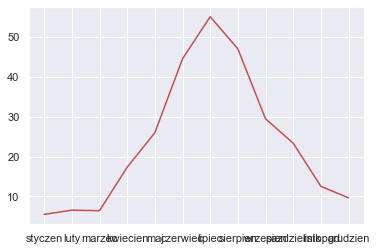

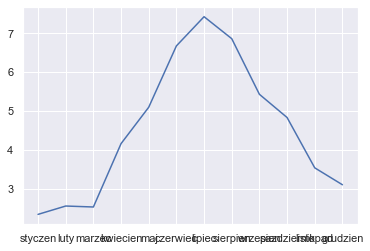

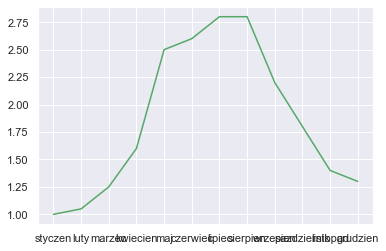

In [24]:
dftemp = df.copy()
df2=dftemp.loc[dftemp['Suma dobowa opadu [mm]'] < 45].copy()
df2=df2.loc[df2['Suma dobowa opadu [mm]'] > 0 ]
df2=df2.loc[df2['Srednie dobowe cisnienie na poziomie stacji [hPa]'] < 1010]
df2=df2.loc[df2['Srednie dobowe cisnienie na poziomie stacji [hPa]'] > 980]
dftemp = df2.loc[df2['Suma dobowa opadu [mm]'] > 0].copy()

df2=df2.loc[df2['Miesiac'] == 3]
tempnp=np.zeros([3,12])

for i in range(0,12):
    dftempnp = dftemp.loc[dftemp['Miesiac'] == i+1].copy()
    tempnp[0,i] = dftempnp['Suma dobowa opadu [mm]'].var()
    tempnp[1,i] = dftempnp['Suma dobowa opadu [mm]'].std()
    tempnp[2,i] = dftempnp['Suma dobowa opadu [mm]'].median()



dftemp = dftemp.loc[dftemp['Miesiac'] == 1]
fig = px.scatter_3d(df, x='Srednie dobowe cisnienie na poziomie stacji [hPa]',
                        z='Suma dobowa opadu [mm]', 
                        y= 'Rok', color='Rok')
fig.show()

fig = px.scatter_3d(dftemp, x='Srednie dobowe cisnienie na poziomie stacji [hPa]',
                        z='Suma dobowa opadu [mm]', 
                        y= 'Rok', color='Rok')
fig.show()

fig = px.scatter_3d(df2, x='Srednie dobowe cisnienie na poziomie stacji [hPa]',
                        z='Suma dobowa opadu [mm]', 
                        y= 'Miesiac', color='Miesiac')
fig.show()

#fig, ax = plt.subplots()  # Create a figure containing a single axes.
plt.plot(['styczen','luty','marzec','kwiecien','maj','czerwiec','lipiec','sierpien','wrzesien','pazdziernik','listopad','grudzien'],tempnp[0],'r');  # Plot some data on the axes.
plt.show()
plt.plot( ['styczen','luty','marzec','kwiecien','maj','czerwiec','lipiec','sierpien','wrzesien','pazdziernik','listopad','grudzien'],tempnp[1],'b');  # Plot some data on the axes.
plt.show()
plt.plot( ['styczen','luty','marzec','kwiecien','maj','czerwiec','lipiec','sierpien','wrzesien','pazdziernik','listopad','grudzien'],tempnp[2],'g');  # Plot some data on the axes.
plt.show()

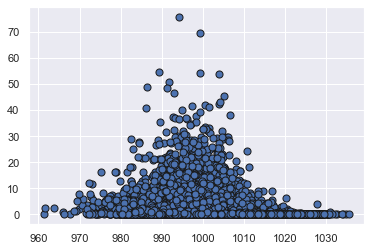

In [29]:

fig, ax = plt.subplots()  # Create a figure containing a single axes.
#ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
ax.scatter(dob_sr_cs, dob_sum_op, s=50, facecolor='C0', edgecolor='k')

1. Ciśnienie -> Opady

test_log = ['Srednia dobowe cisnienie na poziomie stacji [hpa]'] > 0
test_log = ['Status pomiaru SMDB [hpa]'] != 8

dob_sr_cs = df['Srednia dobowe cisnienie na poziomie stacji [hpa]']
dob_sum_op = df['Suma dobowa opadu [mm]']

dob_sr_cs 

['Srednia dobowe cisnienie na poziomie stacji [hpa]'] -> ['Suma dobowa opadu [mm]']


X = df['column'].var()
df['column_name'].std()
df['column1'].median()
df.mode()

!# Korelacja spearmana
coef, p = scipy.stats.spearmanr(data1, data2)
!# Korelacja kandela
coef, p = scipy.stats.kendalltau(data1, data2)

Wykresy: (punktowy, liniowy, etc., heatmapa)

Wstępnie badane korelacje:

pomysł - 1 oś X i N danych na osi Y

1.Ciśnienie -> Opady

2.Ciśnienie -> Średnia dobowa prędkość wiatru
3.Ciśnienie <-> Temperatura  
4.Wilgotność -> Opady
5.Temperatura -> Opady
6.Ciśnienie -> Występowanie błyskawicy
7.Temperatura przy gruncie -> mgła
8.Wilgotność -> mgła
9.(Ciśnienie + Temp) -> rodzaj opadów
10.Czas trwania zamieci śnieżnej(niska i wysoka) -> (temperatura + pokrywa śnieżna)
11.Ciśnienie + temp -> czas trwania 
12.Czas trwania burzy -> czas trwania wiatru ?!?!?!?!?!?!?!?!?!?!?!?!?!
13.Ciśnienie + średnie dobowe zachmurzenie ogólne -> czas trwania burzy
14.Opady dzienne + siła wiatru + średnia temperatura dobowa + zachmurzenie + ciśnienie -> wysokość wody gruntowej
15: Temp + wilgotnosc + naslonecznienie -> dlugosc okresu bez deszczu/poziom wód gruntowych

Zagrożenie ulewą: 14
Mgła: 8+7
Opady (Rodzaj i ilość): 1+5+4+9
Burza (wystąpienie pioruna): 1+11+13
Wiatr >15m/s: 3
Susza: 15
Zamieć śnieżna: 10 + średnia prędkość wiatru
Burza (pod huragan): długość trwania burzy + wystąpienie wiatru>15m/s + wystąpienie błyskawicy -> ciśnienie dzień wcześniej i w trakcie dnia


!# Zrzut wierszy z brakującymi danymi:
tabela['X'].replace('', np.nan, inplace=True)
tabela.dropna(subset = ['X'], inplace = True)

!# Średnia dla kolumn
!# Wszystkie:
X = df.mean(axis=1)
!# Wybrane
X = df[['col1', 'col3']].mean(axis=1)

!# Wariancja dla kolumn
X = df['column'].var()

!# Średnia harmoniczna
scipy.stats.hmean(df.iloc[:,1:3],axis=0)
scipy.stats.hmean(df.loc[:,"Score1"])

!# Odchylenie standardowe
df['column_name'].std() 
df[['column_name1', 'column_name2']].std()
df.std() 

!# Mediana
#find median value in specific column
df['column1'].median()

#find median value in several columns
df[['column1', 'column2']].median()

#find median value in every numeric column
df.median()

!#Moda
df.mode()

!# Korelacja spearmana
coef, p = scipy.stats.spearmanr(data1, data2)

!# Korelacja kandela
coef, p = scipy.stats.kendalltau(data1, data2)

Metody czyszczenia i uzupełniania danych:

Seaborn funkcje:
https://seaborn.pydata.org/tutorial.html
https://seaborn.pydata.org/tutorial/introduction.html
https://seaborn.pydata.org/tutorial/function_overview.html
sns.set_theme()
sns.relplot()
sns.lmplot()
sns.displot()
sns.catplot()
sns.jointplot()
sns.pairplot()

"""""""""
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6)

!# Matplotlib:
https://matplotlib.org/stable/tutorials/index.html
!# Pyplot:
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
https://matplotlib.org/stable/gallery/images_contours_and_fields/barb_demo.html


np.random.seed(1)
!# prepare data
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)
!# plot
plt.scatter(data1, data2)
plt.show()

!# calculate spearman's correlation
coef, p = scipy.stats.spearmanr(data1, data2)

!# seed random number generator
np.random.seed(1)
!# prepare data
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)
!# calculate spearman's correlation
coef, p = scipy.stats.spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
!# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

!# calculate kendall's correlation
coef, p = scipy.stats.kendalltau(data1, data2)
!# calculate the kendall's correlation between two variables
!# seed random number generator
np.random.seed(1)
!# prepare data
data1 = np.random.rand(1000) * 20
data2 = data1 + (np.random.rand(1000) * 10)
!# calculate kendall's correlation
coef, p = scipy.stats.kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)
!# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/